Implement Christofides 1.5-approximation algorithm for the TSP.
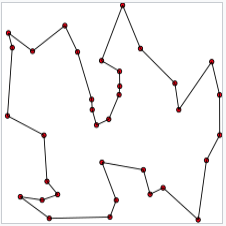

In [1]:
import networkx as nx

n = 20                     # number of cities
G = nx.complete_graph(20)  # graph with a vertex for each city

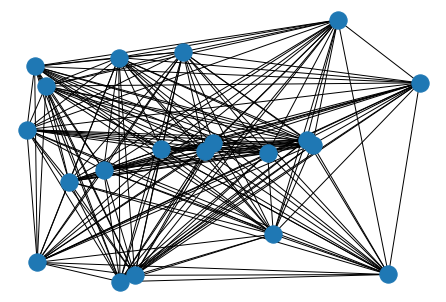

In [2]:
# for convenience, pick the city (x,y)-coordinates at random
import random

my_pos = { i : ( random.random(), random.random() ) for i in G.nodes } # pos[i] = (x_i, y_i)
nx.draw(G, pos=my_pos)

In [3]:
# for convenience, suppose that distances are Euclidean
import math
def eucl_dist(x1,y1,x2,y2):
    return math.sqrt( (x1-x2)**2 + (y1-y2)**2 )

for i,j in G.edges:
    (x1,y1) = my_pos[i]
    (x2,y2) = my_pos[j]
    G.edges[i,j]['length'] = eucl_dist(x1,y1,x2,y2)

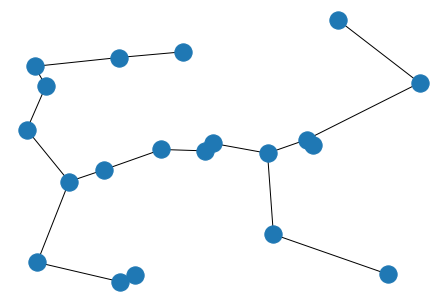

In [4]:
# find minimum spanning tree
T = nx.minimum_spanning_tree(G,weight='length')
nx.draw(T, pos=my_pos)

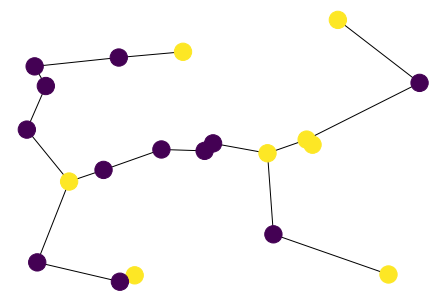

In [5]:
# identify the odd-degree nodes
odd_degree_nodes = [ i for i in T.nodes if T.degree(i) % 2 ]
node_colors = [ T.degree(i) % 2 for i in T.nodes ]
nx.draw(T, pos=my_pos, node_color=node_colors)

In [6]:
# find a minimum-cost perfect matching over the odd-degree nodes
for i,j in G.edges:
    G.edges[i,j]['neg_length'] = - G.edges[i,j]['length']
    
matching = nx.max_weight_matching( G.subgraph(odd_degree_nodes), maxcardinality=True, weight='neg_length')
print(matching)

{(2, 15), (4, 13), (10, 14), (17, 6)}


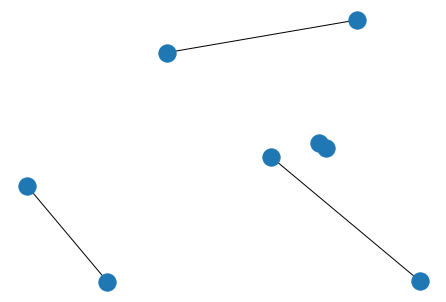

In [7]:
# draw the matching
nx.draw(G.edge_subgraph(matching),pos=my_pos)

In [8]:
# create a multigraph with edge_set = (spanning tree edges) + (matching)
M = nx.MultiGraph()

M.add_nodes_from(range(n))

M.add_edges_from(T.edges())
M.add_edges_from(matching)

print(M.edges())
print("M has this many edges =",M.number_of_edges())

[(0, 15), (0, 16), (1, 19), (1, 16), (2, 9), (2, 15), (3, 10), (3, 14), (4, 18), (4, 13), (5, 8), (5, 15), (6, 17), (6, 17), (6, 10), (6, 12), (7, 8), (7, 18), (9, 11), (10, 19), (10, 14), (11, 15), (12, 13)]
M has this many edges = 23


In [9]:
# find an Eulerian cycle of the multigraph
initial_tour = list ( nx.eulerian_circuit(M,source=0) )
print(initial_tour)

[(0, 16), (16, 1), (1, 19), (19, 10), (10, 14), (14, 3), (3, 10), (10, 6), (6, 17), (17, 6), (6, 12), (12, 13), (13, 4), (4, 18), (18, 7), (7, 8), (8, 5), (5, 15), (15, 11), (11, 9), (9, 2), (2, 15), (15, 0)]


In [10]:
# take shortcuts (avoid repeated nodes)
tour = [ 0 ]
for (i,j) in initial_tour:
    if j not in tour:
        tour.append(j)
print(tour)

[0, 16, 1, 19, 10, 14, 3, 6, 17, 12, 13, 4, 18, 7, 8, 5, 15, 11, 9, 2]


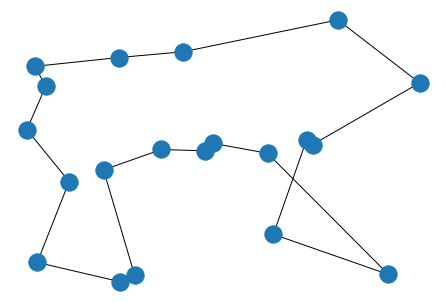

In [11]:
# draw the tour
tour_edges = [ (tour[i-1],tour[i]) for i in range(n) ]
nx.draw(G.edge_subgraph(tour_edges), pos=my_pos)